In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data=pd.read_csv(r"/Users/abhijeetburagohain/Downloads/laptops_dataset_final_600.csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24113 entries, 0 to 24112
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    24113 non-null  object 
 1   overall_rating  24113 non-null  float64
 2   no_ratings      24113 non-null  object 
 3   no_reviews      24113 non-null  object 
 4   rating          24113 non-null  int64  
 5   title           24113 non-null  object 
 6   review          24113 non-null  object 
 7   review_length   24113 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 1.5+ MB


In [5]:
data['review_length'] = data['review'].apply(lambda x: len(str(x).split()))
print(data['review_length'].describe())

count    24113.000000
mean        17.465268
std         22.178499
min          1.000000
25%          3.000000
50%          8.000000
75%         22.000000
max        108.000000
Name: review_length, dtype: float64


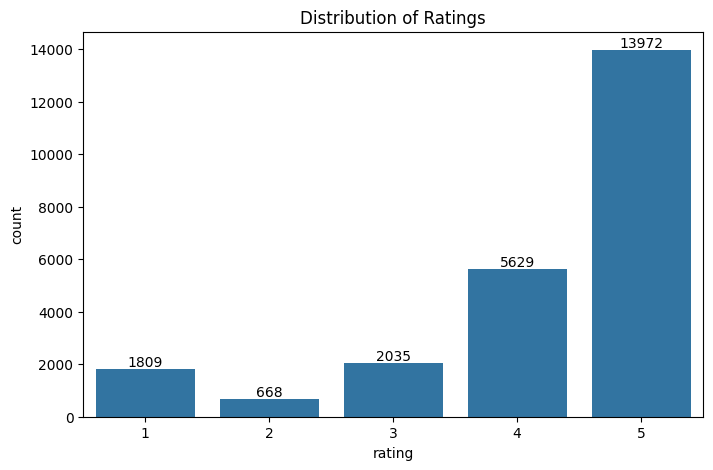

In [15]:
# Visualizing the count of each reviews

plt.figure(figsize=(8,5))
ax = sns.countplot(x=data['rating'])
plt.title("Distribution of Ratings")

# Add count labels on top of bars
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 1, count, ha='center', va='bottom', fontsize=10)

plt.show()


In [19]:
data['title_length'] = data['title'].apply(lambda x: len(str(x).split()))
print(data['title_length'].describe())

count    24113.000000
mean         1.898478
std          0.945589
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         13.000000
Name: title_length, dtype: float64


In [20]:
data.head()

,product_name,overall_rating,no_ratings,no_reviews,rating,title,review,review_length,title_length
0,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Perfect product!,"Loved it, it's my first MacBook that I earned ...",13,2
1,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Battery lasted longer than my first relationsh...,58,1
2,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Such a great deal.. very happy with the perfor...,16,1
3,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,4,Delightful,"Awesome build quality and very good display, b...",14,1
4,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Awesome,When i ordered and came to know about seller r...,90,1


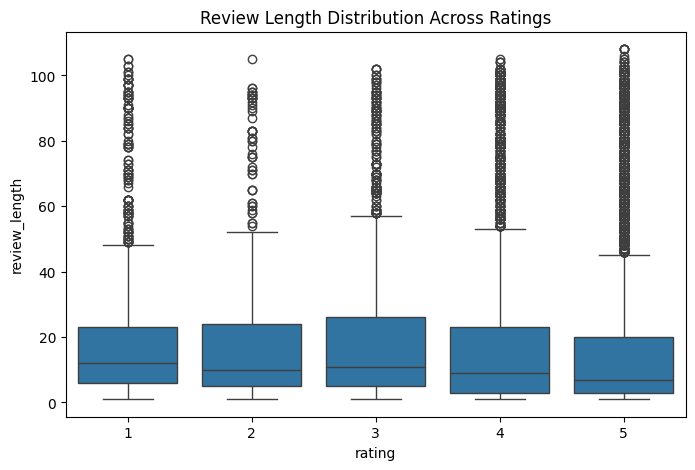

In [23]:
# Review Length vs Rating (1,2,3,..)
plt.figure(figsize=(8,5))
sns.boxplot(x=data['rating'], y=data["review_length"])
plt.title("Review Length Distribution Across Ratings")
plt.show()


In [27]:
## Correlation between title_length and review_length
correlation = data['title_length'].corr(data['review_length'])
print(f"Correlation between title_length and review_length: {correlation:.4f}")


Correlation between title_length and review_length: 0.0568


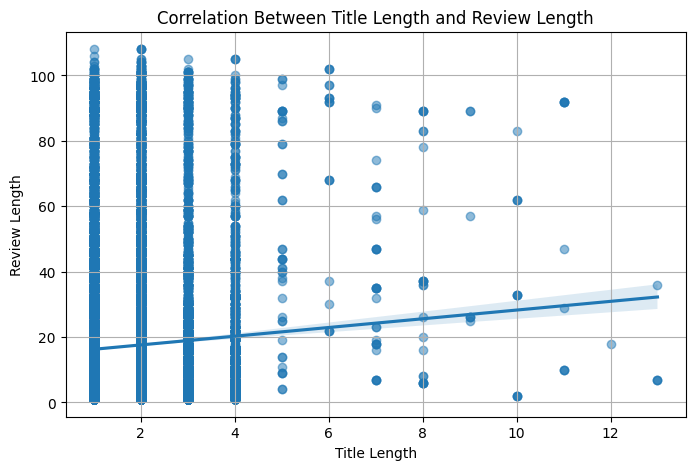

In [29]:
##  reglplot between title_length vs review_length
plt.figure(figsize=(8, 5))
sns.regplot(x='title_length', y='review_length', data=data, scatter_kws={'alpha':0.5})
plt.title("Correlation Between Title Length and Review Length")
plt.xlabel("Title Length")
plt.ylabel("Review Length")
plt.grid(True)
plt.show()


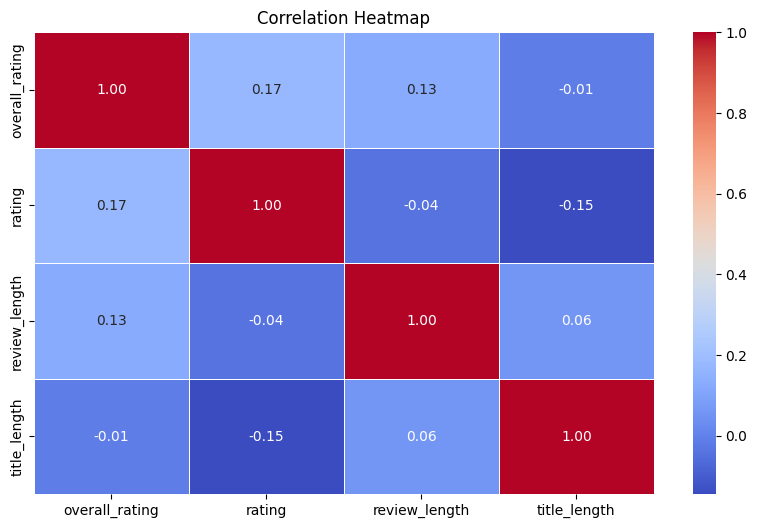

In [32]:
## Understanding the correlation between the different numeric columns of the dataframe

correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


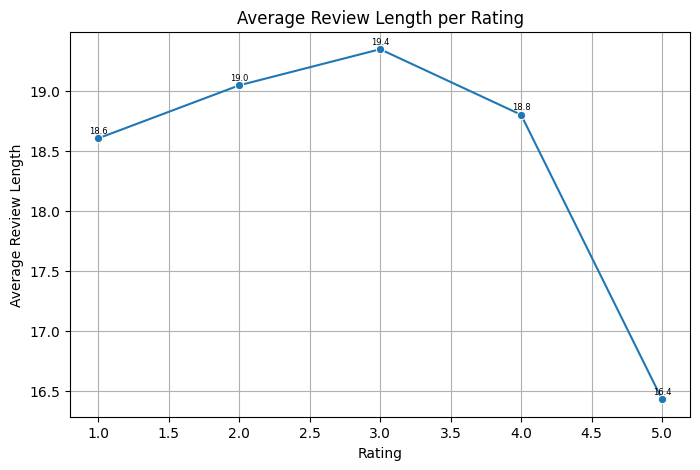

In [51]:
## Average Review_length vs Rating
avg_review_length = data.groupby('rating')['review_length'].mean()

plt.figure(figsize=(8,5))
ax=sns.lineplot(x=avg_review_length.index, y=avg_review_length.values, marker='o')
for x, y in zip(avg_review_length.index, avg_review_length.values):
    ax.text(x, y + 0.1, f"{y:.1f}", ha='center', va='top', fontsize=6, color='black')

plt.xlabel("Rating")
plt.ylabel("Average Review Length")
plt.title("Average Review Length per Rating")
plt.grid(True)

plt.show()

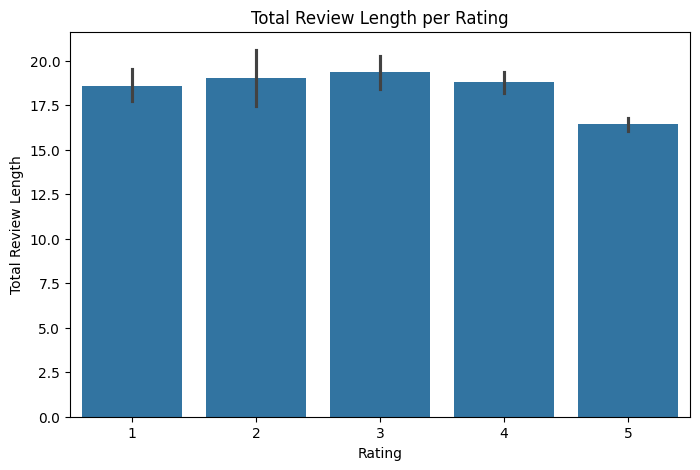

In [64]:
## Bar plot of the above plot
plt.figure(figsize=(8,5))
sns.barplot(x=data['rating'], y=data["review_length"])

plt.xlabel("Rating")
plt.ylabel("Total Review Length")
plt.title("Total Review Length per Rating")
plt.show()

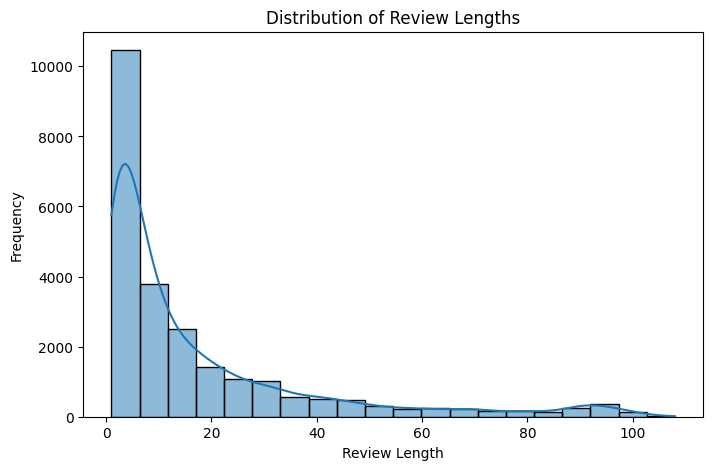

In [66]:
## Distribution of Review_length
plt.figure(figsize=(8,5))
sns.histplot(data['review_length'], bins=20, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

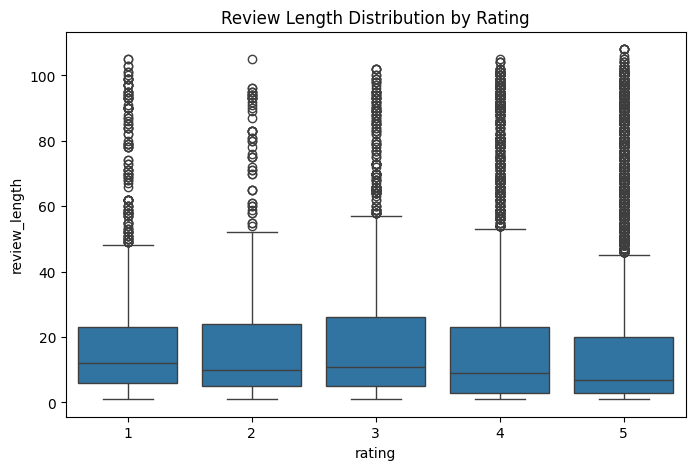

In [70]:
## Detecting the outliers

# Step 1: Filter data for rating 2
rating_2_data = data[data['rating'] == 1]

# Step 2: Get review lengths for rating 2
review_lengths = rating_2_data['review_length']

# Step 3: Calculate IQR (Interquartile Range)
Q1 = review_lengths.quantile(0.25)
Q3 = review_lengths.quantile(0.75)
IQR = Q3 - Q1

# Step 4: Define outlier threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 5: Find outliers
outliers = rating_2_data[review_lengths > upper_bound]

# Step 6: Display count and lengths
print("Number of outliers in rating 2:", len(outliers))
print("Lengths of outlier reviews:")
print(outliers['review_length'].values)


Number of outliers in rating 2: 140
Lengths of outlier reviews:
[ 52  97  71  79  71  52  79  84  79  84  55  68  80  90  62  62  95  97
  86  62  54  74  62  62  59  58  99  93  52  71  73  71  93  58  79  84
  90  51  90  60  53  97  97  90  51  79  84  78  69  57  55  94  97  53
  58  70  74  55  94  90  73  49  50  67  50  49  91 103  49  99  60  99
  57  99 105  55  94  50  78  69  93 103  93  52  58  85  51  62  49  95
  70  49  95  53 100  62  70  49  95  51  85  93  82  52  99  57  68  62
  88  57  82  52  99  69  66  60  87  59  60  50  78  50  78  87  62  93
  94  90  59 101  59 101  97 105  70  58  58  90  90  58]


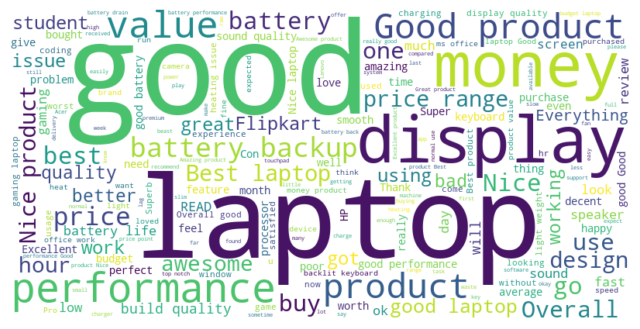

In [76]:
## Visualizing the most common word in the dataset

from wordcloud import WordCloud

text = " ".join(data['review'].dropna())  # Merge all reviews into one text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(8,5))
plt.imshow(wordcloud, interpolation="bilinear")   #lanczos
plt.axis("off")
plt.show()

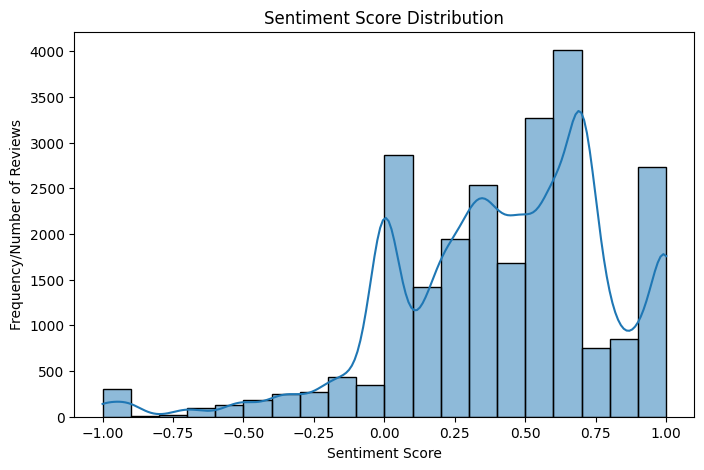

In [80]:
## Visualizing a rough sentiments of the reviews
from textblob import TextBlob

data['sentiment'] = data['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(8,5))
sns.histplot(data['sentiment'], bins=20, kde=True)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency/Number of Reviews")
plt.show()

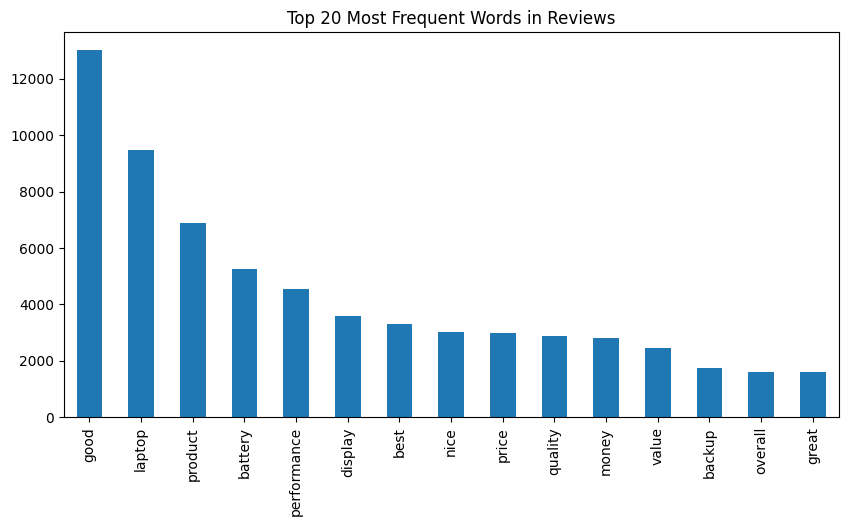

In [83]:
## visualizing the most frequest words in the dataset [top 20]

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=15)
X = vectorizer.fit_transform(data['review'].dropna())

word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_counts.sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Top 20 Most Frequent Words in Reviews")
plt.show()


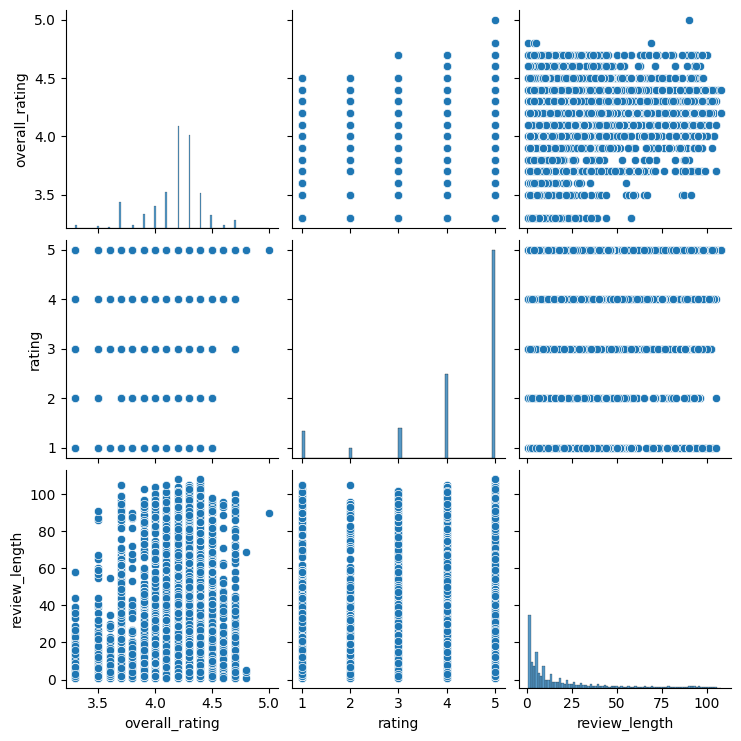

In [87]:
## Plotting a pairplot betwen the overall_rating, rating and review_length
sns.pairplot(data[['overall_rating', 'rating', 'review_length']])
plt.show()

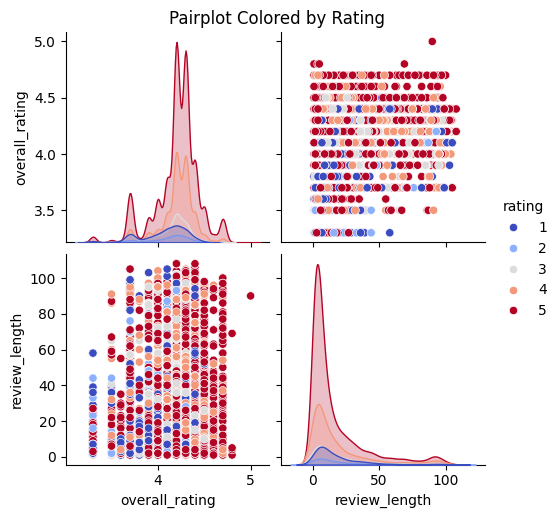

In [88]:
## Plotting between overall_rating and review_length and using rating to color the scatter points
sns.pairplot(data[['overall_rating', 'rating', 'review_length']], 
             hue='rating', palette='coolwarm', diag_kind='kde')

plt.suptitle("Pairplot Colored by Rating", y=1.02)
plt.show()

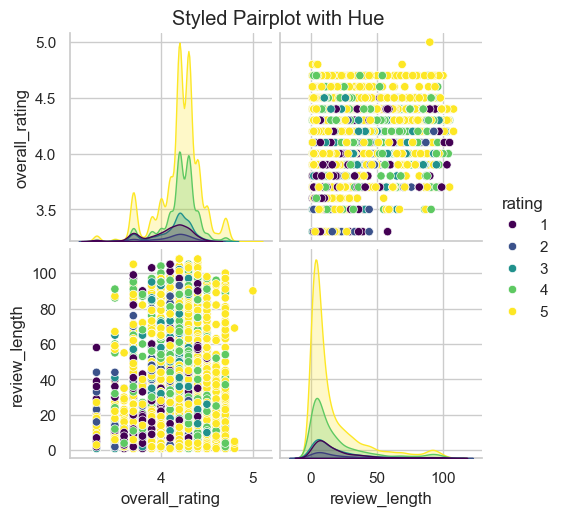

In [89]:
## Different version of the above plot
sns.set(style="whitegrid")  # Clean look
sns.pairplot(data[['overall_rating', 'rating', 'review_length']],
             hue='rating', palette='viridis', height=2.5)

plt.suptitle("Styled Pairplot with Hue", y=1.02)
plt.show()

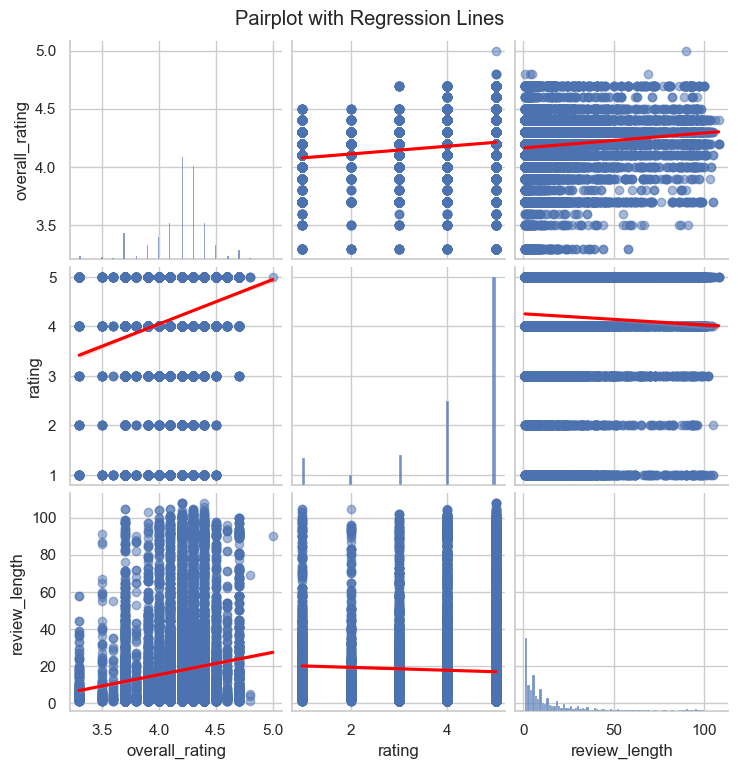

In [90]:
## Plotting with the regression line, to see the trend
sns.pairplot(data[['overall_rating','rating', 'review_length']],
             kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})

plt.suptitle("Pairplot with Regression Lines", y=1.02)
plt.show()